In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
import util

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

SystemError: execution of module _geoslib raised unreported exception

In [ ]:
map = Basemap(projection='stere',lat_0=90,lon_0=-105,\
            llcrnrlat=24 ,urcrnrlat=46,\
            llcrnrlon=-120,urcrnrlon=-65,\
            resolution='l',area_thresh=10)

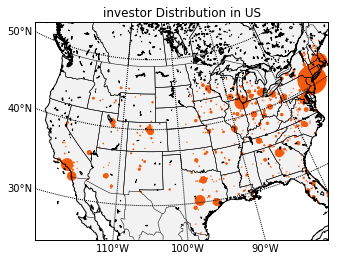

In [4]:
map.drawmapboundary()   # 绘制边界
#map.fillcontinents()   # 填充大陆，发现填充之后无法显示散点图，应该是被覆盖了
map.drawstates()        # 绘制州
map.drawcoastlines()    # 绘制海岸线
map.drawcountries()     # 绘制国家
# map.drawcounties()      # 绘制县

# map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'grey',alpha = .1) 

parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) # 绘制纬线

meridians = np.arange(-110.,-60.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # 绘制经线

# x,y=map(-110,40)
# map.plot(x,y,marker='D',color='m')

df_investor_location = pd.read_excel('Table/CEO_location_clear.xlsx')
df_investor_location.reset_index(drop=True, inplace=True)
Num = np.array(df_investor_location['Number'],dtype=float)
La = np.array(df_investor_location['Latitude'])
Lo = np.array(df_investor_location['Longitude'])

size = (Num/np.max(Num))*800
x,y = map(Lo,La)
#color='#FF5600'
map.scatter(x,y,s=size,cmap=cm)
# plt.scatter(x,y,s=size,cmap=cm.hsv)
# plt.show()
plt.title('investor Distribution in US')
plt.savefig("CEO_success.png")

In [8]:
import pygal.maps.world

wm_style=pygal.style.RotateStyle('#3399AA',base_style=pygal.style.LightColorizedStyle)
worldmap_chart = pygal.maps.world.World(style=wm_style)
worldmap_chart.title = 'Minimum deaths by capital punishement (source: Amnesty International)'
worldmap_chart.add('', {
  'af': 14,
  'bd': 1,
  'by': 3,
  'cn': 1000,
  'gm': 9,
  'in': 1,
  'ir': 314,
  'iq': 129,
  'jp': 7,
  'kp': 6,
  'pk': 1,
  'ps': 6,
  'sa': 79,
  'so': 6,
  'sd': 5,
  'tw': 6,
  'ae': 1,
  'us': 43,
  'ye': 28
})

worldmap_chart.render_to_file('bar_chart.svg')

In [10]:
#coding=utf-8 
import json 
import pygal.maps.world 
#Pygal样式保存在模块style中，包括RotateStyle调整颜色和LightColorizedStyle加亮颜色 
#也可以写成from pygal.style import LightColorizedStyle, RotateStyle 
import pygal.style

In [14]:
def code_dic():
    dic = {}
    code = pd.read_excel('country_abbr.xlsx')  
    code.reset_index(drop=True, inplace=True)
    tmp_code = code["code"]
    tmp_country = code["Country"]
    for i in range(len(code)):
        dic[tmp_country[i]] = tmp_code[i]
    return dic

abbr_dic = code_dic()

In [17]:
COM = pd.read_excel('Company.xlsx')  
COM.reset_index(drop=True, inplace=True)
Loc = pd.read_excel('CompanyLocationRelation.xlsx')
Loc.reset_index(drop=True, inplace=True)
Loc = Loc.loc[Loc["LocationType"] == "Primary HQ"]

In [88]:
foundyear_dic = util.build_dic_function(list(COM["CompanyID"]),list(COM["YearFounded"]),"None")  ####### company:foundyear
def calculate():
    tmp_cc = list(Loc["CompanyID"])
    tmp_ll = list(Loc["Country"])
    loc_dic = {}
    for i in range(len(Loc)):
        cc = tmp_cc[i]
        ll = tmp_ll[i]
        if pd.isnull(ll):
            continue
        loc_dic[cc] = ll
    return loc_dic

loc_dic = calculate()
company_list= list(loc_dic.keys())

year = 2010
country_number = []
for tmp in company_list:
    if (tmp not in foundyear_dic.keys()) or (foundyear_dic[tmp] > year):
        continue
    country_number.append(loc_dic[tmp])
print(len(list(set(country_number))))

147


In [89]:
data_dict = {}
for key in country_number:
    data_dict[key] = data_dict.get(key,0) + 1

In [90]:
cc_number = {}
count = 0
for tmp in data_dict.keys():
    add = ""
    if tmp == "South Korea":
        add = "kr"
    elif tmp == "Russia":
        add = "ru"
    elif tmp == "Taiwan":
        add = "tw"
    elif tmp == "Vietnam":
        add = "vn"
    elif tmp in ['Cayman Islands','Laos',"Bermuda","Gibraltar","Kosovo","Qatar","Micronesia",
                 "Polynesia","Bahamas","Barbados","Ivory Coast","Curacao","Grenada","Saint Lucia","Trinidad and Tobago",
                 "American Samoa","Anguilla","Antigua","Fiji"]:
        continue
    elif tmp == 'Syria':
        add = 'sy'
    elif tmp == "British Virgin Islands":
        add = "gb"
    elif tmp == "Iran":
        add = "ir"
    elif tmp == "Tanzania":
        add = "tz"
    elif tmp == "Venezuela":
        add = "ve"
    elif tmp == "Macedonia":
        add = "mk"
    elif tmp == "Bolivia":
        add = "bo"
    elif tmp == "The Gambia":
        add = "gm"
    elif tmp == "Palestine":
        add = "ps"
    elif tmp == "Moldova":
        add = "ro"
    elif tmp == "Brunei":
        add = "bn"
    count += 1
    if (add == "") and (tmp not in abbr_dic.keys()):
        print(tmp)
        print(count)
    if add == "":
        add = abbr_dic[tmp]
    cc_number[add] = data_dict[tmp]

In [92]:
# cc_populations[code]

cc_pops_1,cc_pops_2,cc_pops_3={},{},{} 
for cc,pop in cc_number.items(): 
    if pop < 1000:
        cc_pops_1[cc] = pop
    elif pop < 5000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop 
print(len(cc_pops_1),len(cc_pops_2),len(cc_pops_3)) 
  

 #画图 
#wm_style是一个样式对象，第一个实参表示颜色，十六进制格式，分别表示红绿蓝的分量(RGB），第二个实参表示加亮颜色主题 
wm_style=pygal.style.RotateStyle('#3399AA',base_style=pygal.style.LightColorizedStyle) 
wm=pygal.maps.world.World(style=wm_style) 
wm.title="Distribution of venture company in 2010,by Country"
  
#add接收一个标签和一个列表，此例中标签为人口数量区间，列表是国家和人口数量的列表 
wm.add('0-1000',cc_pops_1) 
wm.add('1000-5000',cc_pops_2) 
wm.add('>5000',cc_pops_3) 
  
wm.render_to_file('world_population.svg')

130 5 1
